In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        # Check stopping criteria
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(set(y)) == 1:
            return Node(value=Counter(y).most_common(1)[0][0])

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, num_features)
        if best_feature is None:
            return Node(value=Counter(y).most_common(1)[0][0])

        # Split data
        left_idx = X[:, best_feature] < best_threshold
        right_idx = ~left_idx
        left_subtree = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._grow_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y, num_features):
        best_gain, best_feature, best_threshold = -1, None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature], threshold)
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature, threshold

        return best_feature, best_threshold

    def _information_gain(self, y, feature_values, threshold):
        parent_entropy = self._entropy(y)
        left_idx, right_idx = feature_values < threshold, feature_values >= threshold
        if sum(left_idx) == 0 or sum(right_idx) == 0:
            return 0
        left_entropy = self._entropy(y[left_idx])
        right_entropy = self._entropy(y[right_idx])
        child_entropy = (sum(left_idx) * left_entropy + sum(right_idx) * right_entropy) / len(y)
        return parent_entropy - child_entropy

    def _entropy(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] < node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

In [ ]:
# Train decision tree
tree = DecisionTree()
tree.fit(X, y)

In [ ]:
# Make predictions
preds = tree.predict(X)
accuracy = np.mean(preds == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


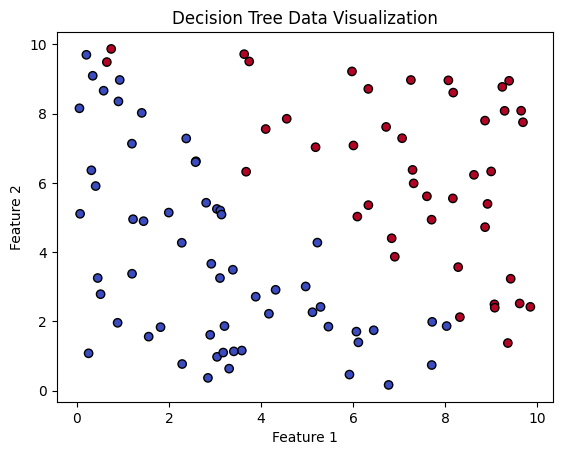

In [ ]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Decision Tree Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()